# Importing required Libraries.

In [22]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh 
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
# =============================================================================================

C:\Users\saipriya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Reading the Datasets:

In [25]:
train_ds=pd.read_csv('./train.csv')
print("Size of Train dataset",train_ds.shape)
label=train_ds['label']
print("Size of labels of Train dataset",label.shape)
train=train_ds.drop("label",axis=1)
print("Size of Features of Train dataset",train.shape)

Size of Train dataset (42000, 785)
Size of labels of Train dataset (42000,)
Size of Features of Train dataset (42000, 784)


# Dimensionality Reduction using PCA

In [29]:
# Data Preprocessing: Standardizing the data:
standardized_data = StandardScaler().fit_transform(train)
print(standardized_data.shape)

(42000, 784)


In [30]:
# Co-variance Matrix
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T , sample_data)
print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [31]:
# Eigen-values and Eigen-vectors
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print("Shape of eigen vectors = ",vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [32]:
new_coordinates = np.matmul(vectors, sample_data.T)
print (" resultanat new data points' shape ", vectors.shape, "*", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) * (784, 42000)  =  (2, 42000)


In [33]:
new_coordinates = np.vstack((new_coordinates, label)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


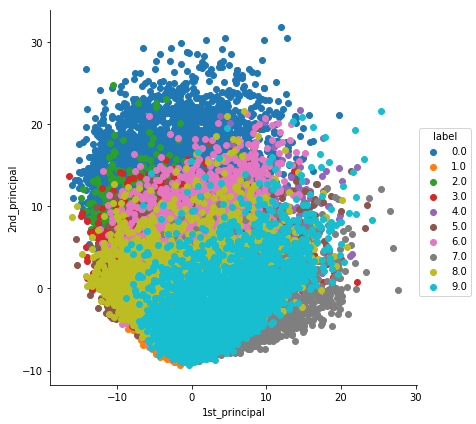

In [34]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# Implementation of PCA using sklearn

In [35]:
pca = decomposition.PCA()
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (42000, 2)


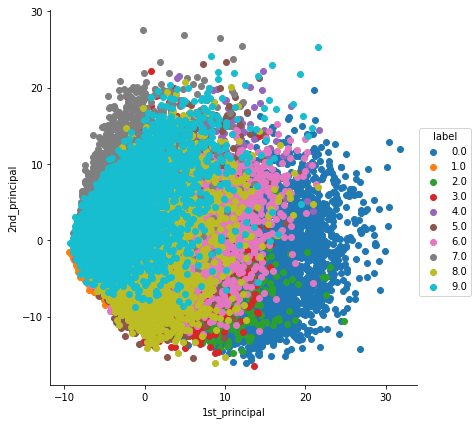

In [36]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# Dimensionality Reduction using T-SNE

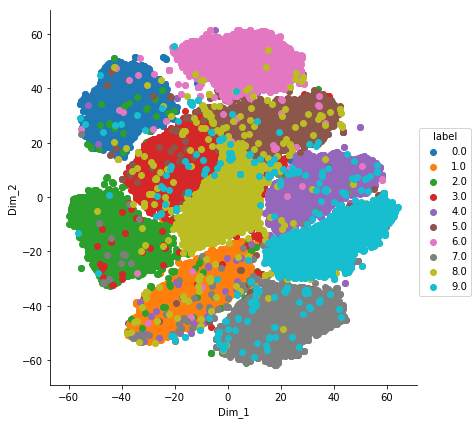

In [19]:

model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(train)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

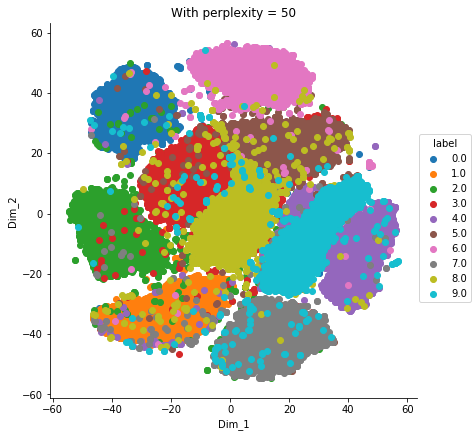

In [16]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(train) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

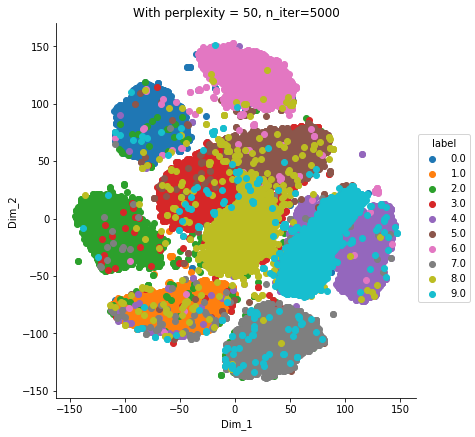

In [17]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(train) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

In [18]:
test_ds=pd.read_csv('./test.csv')
test_ds.shape

(28000, 784)

In [19]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_test_data = model.fit_transform(test_ds)

# Training a Model using K-NN algorithm

In [55]:
# Finding the right k:

X=tsne_df.drop("label",axis=1)
y=label
X_test=test_ds

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X, y, test_size=0.3)
print(X_tr.shape)
print(y_tr.shape)
print(X_cv.shape)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)
   
    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    

(29400, 2)
(29400,)
(12600, 2)

CV accuracy for k = 1 is 95%

CV accuracy for k = 3 is 96%

CV accuracy for k = 5 is 96%

CV accuracy for k = 7 is 96%

CV accuracy for k = 9 is 96%

CV accuracy for k = 11 is 96%

CV accuracy for k = 13 is 96%

CV accuracy for k = 15 is 96%

CV accuracy for k = 17 is 96%

CV accuracy for k = 19 is 96%

CV accuracy for k = 21 is 96%

CV accuracy for k = 23 is 96%

CV accuracy for k = 25 is 96%

CV accuracy for k = 27 is 96%

CV accuracy for k = 29 is 96%


# Predicting the label

In [56]:
X_test=tsne_test_data
# Predicting the label

knn = KNeighborsClassifier(5)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)

In [73]:
data = pd.DataFrame({"ImageId" : np.arange(1,28001),"Label":pred})
data.to_csv("sample_submission.csv",index=False)
data.shape

(28000, 2)

In [74]:
sampl=pd.read_csv("./sample_submission.csv")
sampl

,ImageId,Label
0,1,6
1,2,6
2,3,2
3,4,3
4,5,5
5,6,7
6,7,5
7,8,5
8,9,6
9,10,5
